In [1]:
# -*- coding: utf-8 -*-
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime
import re


RESULT_PATH = '/Users/soojin/Desktop/'
now = datetime.now() #파일이름을 현 시간으로 저장

def get_news(n_url):
    news_detail = []

    breq = requests.get(n_url)
    bsoup = BeautifulSoup(breq.content, 'html.parser')

    title = bsoup.select('h3#articleTitle')[0].text 
    news_detail.append(title)

    pdate = bsoup.select('.t11')[0].get_text()[:11]
    news_detail.append(pdate)

    _text = bsoup.select('#articleBodyContents')[0].get_text().replace('\n', " ")
    btext = _text.replace("// flash 오류를 우회하기 위한 함수 추가 function _flash_removeCallback() {}", "")
    news_detail.append(btext.strip())
  
    news_detail.append(n_url)
    
    pcompany = bsoup.select('#footer address')[0].a.get_text()
    news_detail.append(pcompany)
    print(news_detail)

    return news_detail

def crawler(maxpage,query,s_date,e_date):

    s_from = s_date.replace(".","")
    e_to = e_date.replace(".","")
    page = 1
    maxpage_t =(int(maxpage)-1)*10+2 
    f = open("/Users/soojin/Desktop/crawler_result.txt", 'w', encoding='utf-8')
    
    while page < maxpage_t:
    
        print(page)
    
        url = "https://search.naver.com/search.naver?where=news&query=" + query + "&sort=0&ds=" + s_date + "&de=" + e_date + "&nso=so%3Ar%2Cp%3Afrom" + s_from + "to" + e_to + "%2Ca%3A&start=" + str(page)
        headers = {"user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36"}
        req = requests.get(url, headers=headers)
        print(url)
        cont = req.content
        soup = BeautifulSoup(cont, 'html.parser')
    
        for urls in soup.select(".info"):
            try :
                if urls["href"].startswith("https://news.naver.com"):
                    news_detail = get_news(urls["href"])
                        # pdate, pcompany, title, btext
                    f.write("{}\t{}\t{}\t{}\t{}\n".format(news_detail[1], news_detail[4], news_detail[0], news_detail[2],news_detail[3]))  # new style
            except Exception as e:
                print(e)
                continue
        page += 10
    
    
    f.close()
    
def excel_make():
    data = pd.read_csv(RESULT_PATH+'crawler_result.txt', sep='\t',header=None, error_bad_lines=False)
    data.columns = ['years','company','title','contents','link']
    print(data)
    xlsx_outputFileName = '%s-%s-%s %s시 %s분 %s초 result.xlsx' % (now.year, now.month, now.day, now.hour, now.minute, now.second)
    #xlsx_name = 'result' + '.xlsx'
    data.to_excel(RESULT_PATH+xlsx_outputFileName, encoding='utf-8')

def main():
    maxpage = input("최대 출력할 페이지수 입력하시오: ") 
    query = input("검색어 입력: ")
    s_date = input("시작날짜 입력(2019.01.01):")  
    e_date = input("끝날짜 입력(2019.04.28):")  
    crawler(maxpage,query,s_date,e_date) #검색된 네이버뉴스의 기사내용을 크롤링합니다. 
    excel_make() #엑셀로 만들기
main()
xlsx_outputFileName = '%s-%s-%s %s시 %s분 %s초 result.xlsx' % (now.year, now.month, now.day, now.hour, now.minute, now.second)

최대 출력할 페이지수 입력하시오: 40
검색어 입력: 코로나
시작날짜 입력(2019.01.01):2021.01.01
끝날짜 입력(2019.04.28):2021.06.01
1
https://search.naver.com/search.naver?where=news&query=코로나&sort=0&ds=2021.01.01&de=2021.06.01&nso=so%3Ar%2Cp%3Afrom20210101to20210601%2Ca%3A&start=1
'href'
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnect

https://search.naver.com/search.naver?where=news&query=코로나&sort=0&ds=2021.01.01&de=2021.06.01&nso=so%3Ar%2Cp%3Afrom20210101to20210601%2Ca%3A&start=71
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
'href'
('Connection aborted.', RemoteDisconnected(

['퇴임 OECD 총장 "韓, 코로나 관리 감탄…집값·가계부채 우려"', '2021.05.31.', '\'최장수\' 15년 재임 구리아 총장, 연합뉴스 등 한국언론 인터뷰 "경기회복까지 부양책 멈추지 말아야…고령화·저출산도 해결 과제"한국 특파원들과 인터뷰하는 앙헬 구리아 OECD 사무총장[OECD 사무국 제공. DB 및 재판매 금지](파리=연합뉴스) 현혜란 특파원 = "한국은 2020년 코로나19 대유행 시기에 가장 좋은 성과를 거둔 나라 중 하나라는 다소 놀라운, 아주 매력적인 실적을 갖고 있다. 그렇기 때문에 우리가 한국에 비법을 알려주기보다는, 한국이 비법을 공유해야 하지 않을까 싶다."    \'선진국 클럽\' 혹은 \'부자 클럽\'으로 불리는 경제협력개발기구(OECD)를 15년간 이끌고 6월 1일자로 후임자에게 자리를 넘겨주는 앙헬 구리아(71) 사무총장은 지난 28일(현지시간) 연합뉴스 등 파리 주재 한국 특파원들과 진행한 화상인터뷰에서 \'한국에 조언해줄 게 있느냐\'는 질문에 이같이 답하며 웃었다.    구리아 사무총장은 코로나19 대유행 기간 한국이 경제적인 측면에서 거둔 성과를 긍정적으로 평가하면서도 "경기부양책은 타이밍이 중요하다"며 "경제 회복이 아주 명백해질 때까지 경기부양책을 멈추지 말아야 한다"고 강조했다.    아울러 코로나19 백신 접종 속도를 높이는 것 또한 중요하다고 덧붙였다. 38개 OECD 회원국 사이에서 코로나19 백신을 최소 1회 이상 접종한 인구 비율로 순위를 매기면 한국은 일본, 뉴질랜드에 이어 끝에서 3위에 이름을 올렸다.    한국의 다소 느린 백신 접종 속도가 경제 회복에 차질을 빚을 수 있다고 보느냐는 물음에 구리아 사무총장은 "한국의 백신 접종 속도가 빠른 편은 아니지만, 확진자 규모가 작기 때문에 그것이 시간을 벌어줄 수 있다"고 답했다.    그러면서 "보통 백신 접종률이 낮으면 코로나19 확진자가 많은 편인데 한국의 상황은 독특한 조합"이라며 "상대적으로 코로나19 발병률이 낮았기 때문에 백신 접종 

['코로나19 신규확진 459명 발생…사흘째 400명대', '2021.06.01.', '코로나19 1일 0시 기준 459명 발생…사흘 연속 400명대국내발생 449명, 해외유입 10명…수도권 278명 ◆…사진=질병관리청 홈페이지 갈무리.신종 코로나바이러스 감염증(코로나19) 신규 확진자 수가 사흘 연속 400명대를 기록했다.   질병관리청 중앙방역대책본부(방대본)은 1일 0시 기준 국내 코로나19 신규 확진자는 459명 발생했다고 밝혔다. 누적 확진자는 14만799명이다.   전날 430명보다 29명 증가했지만, 사흘째 400명대를 유지했다.   신규 확진자의 감염 경로는 국내 발생이 449명, 해외 유입이 10명으로 집계됐다.   지역별로 보면 서울 146명, 경기 116명, 인천 16명 등 수도권에서만 278명(61.9%)이 발생했다.   비수도권에서는 부산 28명, 대구 39명, 광주 5명, 대전 19명, 울산 2명, 세종 3명, 강원 14명, 충북 11명, 충남 11명, 전북 6명, 전남 5명, 경북 9명, 경남 8명, 제주 12명이 확진됐다.   일일 신규 확진자 수는 지난 26일 706명 발생한 이후 629명→587명→533명→480명→430→459명로 감소세를 보이고 있다.   사망자는 4명 늘어 누적 1963명(치명률 1.39%)이고, 위·중증 환자는 158명이다.▶ 조세일보 홈페이지▶ 조세일보 네이버 뉴스스탠드 구독(종합/경제)홍준표(honglerance@joseilbo.com)저작권자 ⓒ 조세일보(http://www.joseilbo.com). 무단전재 및 재배포 금지', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=123&aid=0002247302', '조세일보']
'href'
['모더나, 美FDA에 코로나 백신 정식 승인 신청…화이자 이어 두 번째', '2021.06.01.', '"순차적 자료 제출 절차 시작"최종 승인까지 수개월 걸릴 듯[트루프=AP/뉴시스]지난 

['광진구, 코로나 속 빛난 공약이행 3년 연속 최우수', '2021.06.01.', 'KT부지 첨단업무 복합단지 조성 착공…김선갑 구청장 “남은 임기동안 구민과의 약속 이행”김선갑 광진구청장서울 광진구(구청장 김선갑)가 한국매니페스토실천본부에서 주관한 ‘2021 전국 기초자치단체장 공약이행 및 정보공개 평가’에서 3년 연속 최우수 등급(SA)을 달성했다.한국매니페스토실천본부는 전국 기초단체장을 대상으로 공약 이행완료, 2020년 공약목표 달성도, 주민소통, 웹소통, 공약 일치도 등 5개 분야에 대해 평가를 진행했으며 기초자치단체를 SA, A, B, C, D 5개 등급으로 분류했다. 그 결과 광진구는 민선 7기에 종합평가 최우수 등급인 SA 등급을 3년 연속 획득했다.구는 8대 분야 68개 공약에 대한 연차별 추진계획에 맞춰 성실히 공약을 이행하고 있으며, 특히 공약 이행여부에 대한 객관적인 평가와 신뢰행정 구현을 위해 노력한 점에서 높은 평가를 받았다. 이를 위해 구는 전문가 및 구민들로 구성된 ‘민선7기 공약이행평가단’을 구성하고, 정기적인 공약사업 추진 보고회를 통해 추진사항 등을 자체 점검하고 있다. 또 행정여건의 변화 등으로 공약 조정이 필요한 경우 민선7기 공약이행평가단과 적극적으로 소통·조정하며, 이행사항을 포함한 모든 공약 내용을 홈페이지를 통해 투명하게 공개하고 있다.이와 함께 광진구는 민선7기 대표 공약인 지역가치 상승을 실현하기 위해 지난해 12월 ‘KT부지 첨단업무 복합단지 조성’을 위한 착공신고를 마무리하고 2024년 완공을 목표로 추진하고 있다. 오는 7월 중곡동 종합의료복합단지 2단계 사업인 의료행정타운도 준공을 앞두고 있다.아울러 광진복지재단 설립, 자양유수지문화복합시설 건립, 중랑천물놀이장 조성, 미세먼지신호등 설치 사업 등 주요 사업을 완료하고, 50+세대 지원, 국공립어린이집 확충, 장애인가정 지원 확대, 범죄예방 치안환경 구축, 반려동물 복지·문화사업, 민간일자리 발굴 및 공공일자리 확산 등 구민 삶과 밀접한 사업들은 공약 

['[2보] 코로나19 어제 430명 신규확진, 이틀째 400명대 유지…휴일영향', '2021.05.31.', '지역 411명-해외 19명…주말·휴일 검사 건수 감소로 확진자도 줄어오늘도 바쁜 코로나19 선별진료소[연합뉴스 자료 사진](서울=연합뉴스) 신선미 기자 = 국내 신종 코로나바이러스 감염증(코로나19) 유행이 지속하는 가운데 31일 신규 확진자 수는 400명대 초반을 나타냈다.     중앙방역대책본부(방대본)는 이날 0시 기준으로 신규 확진자가 430명 늘어 누적 14만340명이라고 밝혔다.     전날(480명)보다 50명 줄면서 이틀째 400명대를 이어갔다.    코로나19 유행이 최근 다소 진정되는 양상을 보이는 가운데 이날도 확진자 수가 더 줄었지만, 아직 확산세가 확실하게 꺾였다고 보기는 어렵다. 주말·휴일에는 보통 검사 건수가 대폭 줄면서 확진자 수도 감소하기 때문이다.    이날 신규 확진자의 감염경로는 지역발생이 411명, 해외유입이 19명이다.     최근 코로나19 환자 발생 양상을 보면 전국에서 집단감염이 이어지면서 400∼700명대를 오르내리고 있다.    지난 25일부터 이날까지 최근 1주일간 발생한 신규 확진자는 일별로 516명→706명→629명→587명→533명→480명→430명이다. 이 기간 500명대가 3번, 400명대가 2번, 600명대와 700명대가 각 1번이다.    sun@yna.co.kr▶네이버에서도 뉴스는 연합뉴스[구독 클릭]▶[팩트체크]쉽게 한국국적 얻어 혜택만 누린다?▶제보하기<저작권자(c) 연합뉴스(https://www.yna.co.kr/), 무단 전재-재배포 금지>', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012426233', '연합뉴스']
'href'
['전 FDA 국장 “코로나, 中연구소 기원 정황 점점 증가”', '2021.06.01.', "“中 정권교체 없는 한 추정으로 끝날 것”스콧 고틀립 전 F

['日코로나 하루 확진자 2000명대…올림픽 선수단은 백신 접종', '2021.06.01.', "[이미지출처=연합뉴스][아시아경제 김형민 기자] 일본의 신종 코로나바이러스감염증(코로나19) 신규 확진자가 1일 2000명대로 늘었다.현지 공영방송 NHK 집계에 따르면 이날 일본 현지시간으로 오후 7시 30분 현재 일본 전역에서 새로 확인된 코로나19 확진자는 2643명이다.일본의 하루 확진자는 지난달 29일 3595명에서 30일 2877명, 전날 1793명으로 감소했다.일본의 코로나19 누적 확진자는 75만98명으로 늘었다. 코로나19 사망자는 이날 101명 늘어 누적 1만3174명이 됐다.교도통신에 따르면 오는 7월 23일 개막하는 도쿄올림픽을 앞두고 일본 선수단에 대한 코로나19 백신 접종이 이날 시작됐다.첫날 접종자는 대표 선수와 대회 관계자를 포함해 약 200명이다.김형민 기자 khm193@asiae.co.kr▶ 속 시원한 풀이! 2021년 정통사주·운세·토정비결▶ 내가 몰랐던 당신들의 이야기 [나돌] 네이버TV▶ 투자 성공의 핵심은 기업분석! 'CORE' 바로가기<ⓒ경제를 보는 눈, 세계를 보는 창 아시아경제 무단전재 배포금지>", 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=104&oid=277&aid=0004912859', '아시아경제신문']
'href'
['진천군, 코로나19 여파 폐업·예정 소상공인 지원', '2021.06.01.', '1대1 맞춤형 상담·재기교육·직업훈련 등 제공진천군청.© 뉴스1(진천=뉴스1) 김정수 기자 = 충북 진천군은 신종 코로나바이러스 감염증(코로나19) 여파로 폐업했거나 예정인 소상공인을 지원한다고 1일 밝혔다.코로나19 장기화 등으로 어려움에 처한 소상공인의 생산적 일자리 취업을 지원하고 생활안정을 돕는 게 목적이다.직업전환을 희망하는 소상공인에게 전문 컨설턴트 1대1 맞춤형 상담, 재기교육, 체계적인 직업훈련을 지원한다.대상자를 선정한 뒤 재기, 전직교

'href'
'href'
["'기저효과' 40% 웃도는 수출 증가세...지속 성장 변수는 '코로나'", '2021.06.01.', '동영상 뉴스       \t \t[앵커]지난달 수출 증가 폭이 32년 만에 최대치를 기록했습니다.코로나19 직격탄을 받은 지난해 상황과 대비되면서 기저효과를 누린 가운데 주력 품목들이 고르게 성장했기 때문인데요.그러나 올해 하반기에는 증가세가 꺾일 것이라는 전망이 나옵니다.조용성 기자가 보도합니다.[기자]지난달 수출은 507억3천만 달러로 1년 전보다 45.6% 늘었습니다.1988년 8월 이후 32년 만에 최대 상승 폭입니다.41%였던 4월에 이어 처음으로 두 달 연속 40%대 성장을 기록했습니다.15대 주력품목 가운데 선박을 제외한 14개가 늘면서 수출 증가를 이끌었습니다.특히 반도체 수출은 11개월 연속 증가세를 이어가며 백억 달러를 넘었고, 자동차와 석유화학은 90%대, 석유제품은 164% 증가했습니다.정부는 여건이 긍정적으로 변화했다고 보고 수출이 경기회복을 이끌 것으로 기대하고 있습니다.미국과 중국 등 주요 지역에서 수출이 일제히 늘어난 것처럼 세계 교역이 뚜렷한 회복세를 보이고, 경기에 민감한 중간재 품목이 크게 늘고 있는 점을 고무적으로 보고 있습니다.[문동민 / 산업통상자원부 무역투자실장 : 글로벌 교역이 뚜렷한 회복세를 보이고 있습니다. 최근 WTO에 따르면 주요 10대 수출국의 1분기 수출이 모두 증가했는데 이는 코로나19 이후 처음입니다.]반면 수출 기업들은 올해 하반기 수출이 2.3% 상승에 그치며 증가세가 꺾일 것으로 내다보고 있습니다.수출 기업 간에도 전망이 엇갈리고 있는데, 이를 가름할 주된 요인은 코로나19 확산 여부와 수출 대상국의 경제 상황이 꼽힙니다.[이상호 / 한국경제연구원 경제정책팀장 : 수출 경쟁력 강화를 위해서는 무엇보다도 백신 확보를 통해서 코로나19에 효율적으로 대응해서 집단면역을 이루는 게 최우선적인 과제인 것 같고요….]지난해에 이어 올해도 코로나19 영향이 수출과 경제 상황을 좌우

'href'
['페루 코로나19 사망자 7만→18만명 정정…인구 대비 세계 최다', '2021.06.01.', '페루 이키토스 한 공동묘지에 새로 조성된 묫자리들 [AP=연합뉴스 자료사진]    (멕시코시티=연합뉴스) 고미혜 특파원 = 페루가 신종 코로나바이러스 감염증(코로나19) 누적 사망자 수를 종전의 2.6배 수준으로 대폭 정정했다.    페루 정부는 31일(현지시간) 대통령궁에서 기자회견을 열고 지난해 3월 1일부터 지난 22일까지 페루에서 코로나19로 사망한 사람들이 총 18만764명이라고 밝혔다.     전날까지 보건부 통계의 누적 사망자는 6만9천342명이었다.    정부는 지금까진 코로나19 양성 진단을 받은 사망자만 집계에 넣었는데 보다 정확한 집계를 위해 전문가들의 의견에 따라 기준을 변경한 데 따른 것이라고 설명했다.     비올레타 베르무데스 페루 총리는 "업데이트된 정보를 국민에게 알리는 것이 우리의 의무라고 생각했다"고 말했다.    새로 늘어난 페루의 사망자 수는 미국과 브라질, 인도, 멕시코에 이어 전 세계에서 다섯 번째로 많은 것이다.    특히 인구 대비 코로나19 사망자 수로는 페루가 단숨에 전 세계 1위로 올라섰다.    페루 인구는 3천300만 명가량으로, 인구 100만 명당 코로나19 사망자 수가 5천 명을 훌쩍 웃돌게 됐다.    통계사이트 아워월드인데이터와 월드오미터에 따르면 지금까지 인구 대비 코로나19 누적 사망자가 가장 많은 나라는 헝가리로 100만 명당 3천 명 수준이다.    페루의 코로나19 누적 확진자는 195만여 명으로 200만명을 향해가고 있다.    지난달 가파른 재확산이 나타냈던 페루에서는 5월 들어 신규 확진자 수가 다소 줄었으나 여전히 하루 4천∼5천 명 수준을 기록하고 있다.    mihye@yna.co.kr▶네이버에서도 뉴스는 연합뉴스[구독 클릭]▶[팩트체크]\'코로나백신 쉽게 맞는법\'…도움될까?▶제보하기<저작권자(c) 연합뉴스(https://www.yna.co.kr/), 무단 전재-재배포

['군내 코로나19 누적 확진자 961명…육·공군 3명 추가', '2021.06.01.', '신종 코로나바이러스 감염증(코로나19) 임시 선별검사소에서 한 군 장병이 검사를 받고 있다. /연합뉴스        군내 신종 코로나바이러스 감염증(코로나19) 누적 확진자가 1일 961명이 됐다.이날 국방부는 육군과 공군 간부 각 1명, 육군 병사 1명 등 총 3명이 코로나19 확진 판정을 받았다고 밝혔다.서울의 육군 간부는 휴가 복귀 전 진단 검사에서 확진됐다. 경기 오산의 공군 간부는 부대 내 확진자의 접촉자로 분류됐다가 격리 해제 전 진단검사에서 양성 판정을 받았다. 경기 양평의 육군 병사는 휴가 복귀 후 동일집단(코호트) 격리 중 민간 확진자와 접촉자로 통보돼 진단 검사를 받은 결과 확진됐다.군내 누적 확진자는 961명이며, 이 중 61명이 치료를 받고 있다.[김양혁 기자 present@chosunbiz.com] ▶네이버에서 \'명품 경제뉴스\' 조선비즈를 구독하세요▶"이대로는 항공값 3배 올라" 전문가 우려 커졌다▶2030년, 전기차 판 바꿀 \'꿈의 기술\' 온다\t저작권자 ⓒ 조선비즈, 무단 전재 및 재배포 금지', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=366&aid=0000725885', '조선비즈']
'href'
['경북보건환경연구원, 코로나19 변이 바이러스 직접검사…1~2일내 확인', '2021.06.01.', '[안동=뉴시스] 코로나19 바이러스 검사를 하고 있는 경북보건환경연구원 직원. (사진=경북도 제공) 2021.06.01 *재판매 및 DB 금지[안동=뉴시스] 류상현 기자 = 경북도 보건환경연구원이 1일부터 도내에서 채취된 검체 중 코로나19 양성으로 확진된 검체를 대상으로 질병관리청과 공동으로 영국, 브라질, 남아공 변이 바이러스에 대한 검사를 시작한다. 연구원에 따르면 영국, 남아공 및 브라질형 변이 바이러스는 코로나19 바이러스 껍질에 존재하는 표면단백

['4월 면세점 매출 1.5조…코로나 사태 이후 최대', '2021.06.01.', '[서울=뉴시스] (표=한국면세점협회) *재판매 및 DB 금지[서울=뉴시스] 손정빈 기자 = 올해 4월 국내 면세점 매출이 코로나 사태 이후 최대치를 기록했다.1일 한국면세점협회에 따르면 4월 국내 면세점 매출은 1조5574억원이었다. 1년 전과 비교해 약 58% 증가했다. 지난해 4월엔 매출 1조원 선이 무너지며 9867억원에 그쳤다. 이후 면세점 업계는 월 매출 1조원을 회복하긴 했으나 1조5000억원 선은 넘지 못했다.4월 매출의 95%(1조4794억원)는 외국인 매출이었다. 제주도 등을 가기 위해 공항을 이용하는 고객이 늘었고, 무착륙 관광 비행도 있으나 내국인 면세점 매출 비중은 여전히 적었다.면세점 업계 관계자는 "회복세에 있으나 마냥 긍정적으로 보긴 어렵다"며 "매출이 매월 올랐다 내려갔다를 반복하고 있어 5월엔 또 어떻게 될지 모르는 상황"이라고 했다. 올해 1월 매출은 1조3831억원, 2월엔 1조1687억원, 3월엔 1조4347억원이었다.☞공감언론 뉴시스 jb@newsis.com▶ 네이버에서 뉴시스 구독하기▶ K-Artprice, 유명 미술작품 가격 공개▶ 뉴시스 빅데이터 MSI 주가시세표 바로가기<ⓒ 공감언론 뉴시스통신사. 무단전재-재배포 금지>', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0010527864', '뉴시스']
'href'
['WHO, 코로나19 변이 바이러스에 새 명칭 부여', '2021.06.01.', "동영상 뉴스       \t \t세계보건기구, WHO가 코로나19 감염증을 일으키는 주요 변이 바이러스에 그리스 문자를 활용한 새로운 명칭을 부여했습니다.WHO는 영국에서 처음 보고된 변이는 '알파'로, 남아프리카공화국에서 발견된 변이는 '베타'로 이름 붙였습니다. 또 브라질에서 처음 보고된 변이는 '감마'로, 인도에서 처음 발견된 변이는 '델타'

['에스티팜, 코로나19 mRNA 백신 개발 본격화한다', '2021.06.01.', '에스티팜 영문CI (사진제공=에스티팜)[아시아경제 이춘희 기자] 에스티팜이 국내 최초로 LNP 방식을 적용한 코로나19 메신저 리보핵산(mRNA) 백신 개발에 본격적으로 나선다. 에스티팜은 앞서 코로나19 mRNA 백신 개발에 성공한 모더나, 화이자 등이 사용하고 있는 제네반트의 LNP 기술과 특허 출원한 5프라임-캡핑(5’-capping) mRNA 플랫폼 기술을 적용해 코로나19 변이 바이러스에도 대응이 가능한 mRNA 백신의 개발을 본격화한다고 1일 밝혔다.에스티팜의 개발 백신은 숙주 세포와 결합하는 바이러스 돌기인 스파이크 단백질 항원 외에도 제2 항원을 보강하는 한편 면역세포인 T세포의 반응을 증가시킬 수 있는 펩타이드 조각 \'T세포 에피토프(Epitope)\'를 추가했다. 에스티팜은 이러한 개발 방식을 이용할 경우 스파이크 단백질을 단독 항원으로 해 개발된 기존 mRNA백신 보다 효능이 탁월하고 높은 변이 바이러스 예방 효능 유지가 지속되는 백신 개발이 가능할 것으로 보고 있다. 현재 에스티팜은 총 22개의 후보물질을 발굴해 이 중 효능이 탁월한 STP2104, STP2108, STP2120 3종 후보물질을 선정한 상태다. 올해 안으로 이 중 최종 후보물질을 결정해 임상 1상을 개시한다는 방침이다. 이어 mRNA 백신은 신속 개발이 가능한만큼 내년 상반기 안으로 긴급 사용 승인까지 마친다는 계획이다. 에스티팜은 후보물질 선정과정에서 회사의 자체 5프라임-캡핑 기술인 \'스마트캡\'을 적용한 결과 트라이링크의 \'클린캡\' 대비 동등 이상의 효능을 확인했다는 설명이다. 에스티팜은 가격 면에서도 자체 대량생산이 가능한 만큼 30% 이상 저렴하다고 덧붙였다. 회사 측은 현재 클린캡이 전세계 mRNA 신약 개발에 독점적으로 사용되고 있으나 공급이 지연되고 있는 만큼 향후 에스티팜의 스마트캡이 상당 부분을 대체할 수 있을 것으로 기대하고 있다.또한 에스티팜은 LNP에 사용

["코로나 속 15개월 만에 대면면회…'참을 수 없는 기쁨과 눈물'", '2021.06.01.', '15개월 만에 잡은 손(김해=연합뉴스) 김동민 기자 = 1일 오전 경남 김해 진영읍 한국보훈복지의료공단 김해보훈요양원에서 입소자 최봉섭 씨가 딸 최선희 씨와 대면 면회 중 손을 잡고 있다.    이곳은 입소자나 면회자 중 한쪽이라도 코로나19 백신 2차 접종을 마친 경우 대면 면회를 허용했다. 대면 면회 금지 후 15개월 만이다. 2021.6.1 image@yna.co.kr(김해=연합뉴스) 김동민 기자 = "너무 벅찹니다. 올 때는 눈물이 날 것 같았는데 마냥 기쁘네요."    1일 오전 경남 김해시 한국보훈복지의료공단 김해보훈요양원 내 마련된 임시 면회 공간.    면회 시간보다 10여분 일찍 도착한 최선희(47·창원) 씨는 면회실 밖에서 아버지 최봉섭(67) 씨의 큰 목소리가 들려오자 잰걸음으로 마중 나갔다.    선희 씨는 아버지 최 씨 마스크를 코끝까지 올리면서 "운동은 잘하고 계시냐? 얼굴이 좋다"며 활짝 웃었다.    아버지 최 씨는 "은냐(\'그래\'의 방언). 기쁘다"며 딸의 손을 잡으며 반가움을 표했다.    최 씨 부녀는 지난달 4일에는 비대면으로 짧게 만났고, 대면 면회는 15개월 만이다.    그동안 요양병원·요양시설은 임종 등 특수한 상황을 제외하고 비대면 면회만 가능했다.    정부는 이날부터 입소자나 가족 중 한쪽이라도 코로나19 백신 2차 접종을 마친 경우 대면 면회를 허용하면서 이들 부녀는 만날 수 있었다.    이들 부녀 중 아버지 최 씨가 최근 백신 2차 접종을 마쳤다.    선희 씨는 치매를 앓는 아버지 건강이 걱정됐는지 연신 "운동은 잘하시냐?, 식사를 잘하시냐? 잘하시라"고 물었고 아버지 최 씨는 "알았다. 고맙다"고 답했다.     그리고 자신이 창원 집에서 챙겨온 과일과 계란 등을 맛있게 드시라며 아버지께 건넸다.    이들 부녀는 포옹도 하고 손도 잡으며 시종 밝은 분위기로 면회를 이어갔다.    면회 중간에 선희 씨

['코로나로 중단됐던 국민참여재판 9개월 만에 열려', '2021.06.01.', '인천지방법원(법원장 강영수)이 코로나 확산으로 지난해 8월 이후 중단한 국민참여재판을 9개월여만에 재개했다고 1일 밝혔다.인천지방법원전경. /인천지방법원\t\t\t\t\t\t\t\t\t\t인천지법 형사 15부는 지난달 31일 413호 형사대법정에서 국민참여재판을 열고 특정범죄가중처벌등에관한법률위반(향정) 및 마약류관리에관한법률위반(향정) 혐의로 기소된 A씨(32)에 대해 징역 4년을 선고했다.A씨는 미국에서 항공특송화물을 통해 필로폰 4880g(시가 5000만원 이상)을 밀수한 혐의로 기소됐으며, 앞선 공판준비기일에서 국민참여재판을 희망했다.A씨는 “항공특송 화물에 필로폰이 들어있는 줄 몰랐고, 특가법 적용 기준인 5000만원 이상의 필로폰인 줄도 당연히 알지 못했다”고 주장했다. 그러나 배심원 9명은 A씨가 5000만원 이상의 필로폰인지는 사전에 알지 못했을 가능성이 있지만, 항공특송 화물에 필로폰이 든 사실은 충분히 알 수 있었다며 징역 3∼5년의 유죄를 평결했다.법원은 국민참여재판을 진행하기 위해 법정 입구 체온측정 화상카메라 설치, 방청석 내 거리두기, 재판부 및 배심원석 등에 칸막이 설치 등의 조치를 취했다.법원 관계자는 “앞으로 방역 수칙을 지키면서 국민참여재판을 진행할 예정”이라고 말했다.[고석태 기자 kost@chosun.com] \t\t▶ 조선일보가 뽑은 뉴스, 확인해보세요\t\t▶ 최고 기자들의 뉴스레터 받아보세요 \t\t▶ 1등 신문 조선일보, 앱으로 편하게 보세요', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=023&aid=0003617513', '조선일보']
'href'
['강원도 코로나19 의료·방역 인력에 하루 1만원 수당…전국 최초', '2021.06.01.', '병원 의료진 (CG)[연합뉴스TV 제공](춘천=연합뉴스) 양지웅 기자 = 강원도는 의료 시스템을 안정적으로 운

['경북서 코로나19 확진자 9명 추가…김천 등 3곳', '2021.06.01.', "[서울=뉴시스]  31일 0시 기준 국내 누적 코로나19 확진자는 전날보다 430명 증가한 14만340명이다. 신규 확진자 수는 지난 26일 707명 이후 5일간 감소 추세다. (그래픽=안지혜 기자)  hokma@newsis.com[안동=뉴시스] 류상현 기자 = 경북에서 코로나19 확진자 9명이 추가됐다.1일 경북도에 따르면 전날 김천시에서 4명, 포항시에서 3명, 경주시에서 2명이 확진됐다..김천시에서는 A노인시설 관련 지난 달 17일 확진된 '김천 231번' 환자의 접촉자 1명, 지난달 16일 확진된 전남 환자의 접촉자 1명, S단란주점 관련 지난 달 19일 확진된 '김천 243번' 환자의 접촉자 1명, S단란주점 관련 지난 달 27일 확진된 '김천 290번' 환자의 접촉자 1명이 자가격리 중 확진됐다. 포항시에서는 유증상으로 선별진료소에서 검사 후 3명이 확진됐다. 경주시에서는 지난 달 30일 확진된 '경주 399번' 환자의 접촉자 1명, 유증상으로 선별진료소에서 검사 후 1명이 확진됐다.경북에서는 최근 1주일간 국내 79명, 하루평균 11.3명이 확진됐고 현재 2461명이 자가격리 중이다.  최근 30일간의 경북도내 확진자는  32→ 22→ 38→ 22→ 12→ 21→ 19→ 19→ 15→ 7→ 23→ 35→19→ 11→ 27→ 23→ 24→ 33→ 11→ 16→ 12→ 12→ 12→ 9→ 12→ 14→ 13→ 9→ 18→ 9명이다.30일 0시 기준 도내 누적 확진자수는 4701명이며 시·군별로는 경산 1322명, 포항 631명, 구미 588명, 경주 401명, 김천 304명, 안동 273, 청도 190명, 칠곡 156명, 상주 135명, 의성 132명, 영주 89명, 영천 86명, 봉화 74명, 예천 69명, 청송 58명, 고령 49명, 영덕 41명, 문경 30명, 성주 29명, 군위 22명, 울진 15명, 영양 4명, 울릉 3명이다. 누적 사망자는 85명, 누적회복

['P4G 서울선언문 채택…"코로나, 녹색회복 통해 극복해야"', '2021.05.31.', '文대통령, P4G 서울선언문 합의…"경제·사회 구조, 저탄소 방식 전환해야 미래세대 생존"[아시아경제 류정민 기자] \'2021 P4G 서울 녹색미래 정상회의\'에 참석한 각국 정상과 국제기구 대표들은 31일 \'서울선언문\'을 통해 코로나19 극복도 녹색회복을 통해 극복해야 한다고 밝혔다. 문재인 대통령은 이날 P4G 정상세션을 주재하고 서울선언문 채택을 견인했다. 정상들은 "15개 주제별 세션과 이틀간의 정상 세션을 통해 기후위기의 심각성을 다시 한번 공유하고, 이를 극복하기 위해 국제사회와 시민사회, 기업, 미래세대가 함께 노력해 나갈 것을 약속하는 ‘서울선언문’을 채택하기로 합의했다"고 밝혔다. 특히 정상들은 "정상들은 기후위기가 환경문제만이 아니라 경제, 사회, 안보, 인권에 영향을 미치는 문제라는 데 동의하고, 코로나19 역시 녹색회복을 통해 극복해 나가야 한다는 데 인식을 같이 했다"고 강조했다. [이미지출처=연합뉴스]정상들은 "녹색회복은 지구 온도가 산업화 이전보다 1.5도 이상 올라가지 않도록 하자는 파리협정을 실천하기 위한 방안"이라며 "지난해부터 기후위기를 극복하기 위한 국제사회의 노력과 각국의 야심찬 국가온실가스감축목표 제출이 이어지고 있다"고 설명했다. 정상들은 "다가오는 11월, 제26차 기후변화 당사국 총회를 성공적으로 이끌 것이라고 확신한다"면서 "정상들은 또한, P4G가 유엔 주도의 기후변화 대응과 지속가능발전목표 달성 노력을 보완해왔다는 점에 동의했다"고 밝혔다.  이와 관련해 물, 에너지, 식량 및 농업, 도시, 순환경제, 금융, 지자체의 역할 강화, 포용적이고 공정한 전환 분야에서 민관 협력을 강화하기로 했다. 아울러 기후행동 확산을 위해 시민사회의 참여와 역할이 중요하다는 데 의견을 같이했다. [이미지출처=연합뉴스]정상들은 "우리는 기업이 ESG를 지금보다 더 중요하게 여길 것을 촉구한다. 경제·사회 구조 전반을 저탄소 방식으로 

['백신 접종 머지않았는데 ... 서울 고3학생 30명 코로나 확진', '2021.05.31.', '시교육청 "고3 학생 30명, 학부모 2명 확진"울산의 한 고등학교 임시선별검사소에서 학생들이 코로나19 검사를 받고 있다. 울산=뉴시스서울의 한 고등학교에서 이틀 사이 학생 30명이 신종 코로나바이러스 감염증(코로나19)에 감염되는 대규모 감염 상황이 발생했다.서울시교육청은 31일 “강북구 소재 A고등학교에서 3학년 학생 1명이 30일 확진 이후  3학년 및 전 교직원을 대상으로 코로나19 검사를 한 결과 31일 학생 29명이 추가로 확진됐다”고 밝혔다. 지금까지 확진된 학생들은 모두 3학년들로, 무증상으로 확진됐다. 시교육청은 이 밖에 학부모 2명도 확진됐다고 밝혔다.시교육청은 현재 교내 임시선별진료소를 설치한 후 강북구 거주 1, 2학년 학생들을 대상으로 코로나19 검사를 진행 중이라고 밝혔다. 또한 원격수업 중인 타 관내 거주 학생은 가까운 검사소에서 개별 검사를 실시하도록 통보했다.이에 따라 이날부터 A고교는 6월 14일까지 10일간 원격수업으로 전환됐다. A고교 3학년 학생들은 6월 3일 치러지는 한국교육과정평가원의 6월 모의평가를 온라인으로 응시할 예정이다. A고교와 운동장 등을 공유하는 B중학교에 대해서는 이날 전교생과 교직원의 코로나19 검사를 완료하고, 검사 결과를 기다리고 있는 상태다.시교육청은 “대규모 확진 사례가 발생한 만큼 교육지원청 및 학교로부터 세부 현황을 파악 중”이라고 밝혔다.박소영 기자 sosyoung@hankookilbo.com▶내가 먹는 한끼 밥상, 탄소 얼마나 나오나▶생수병 \'절취선 라벨\' 환경의 적이라고요?▶한국일보닷컴 바로가기', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=469&aid=0000607856', '한국일보']
'href'
['KT스카이라이프, 코로나19 백신 유급 휴가 도입', '2021.05.31.', '(서울=연합뉴스) 

['보령제약 "코로나 백신 맞으면 2일 유급휴가에 격려품 지급"', '2021.06.01.', '보령제약이 코로나19 백신 접종 독려를 위해 지난 5월27일부터 전 임직원 대상으로 \'백신 유급휴가\'를 시행 중이라고 1일 밝혔다.코로나19 백신을 접종한 보령제약 임직원들은 접종 당일과 다음날 총 2일의 유급 휴가를 지원받게 된다. 화이자, 아스트라제네카 등 두 차례 맞아야 하는 백신을 접종할 경우 연차 소진 없이 총 4일의 유급휴가가 주어진다. 코로나 19 백신을 접종한 임직원들은 격려품으로 \'배달앱 상품권\'도 함께 지급받는다.보령제약의 이번 조치는 코로나19 잔여 백신을 예약 및 접종하기 시작한 5월27일 당일부터 바로 시행됐다. 보령제약은 코로나19 사태 초기부터 유연근무제와 재택근무를 실시했을 뿐만 아니라 전 임직원 대상으로 무상 마스크를 지급하는 등 코로나19 극복을 위해 적극적으로 관련 대책들을 시행해왔다.보령제약 안태완 인사팀장은 "사람의 건강을 생각하는 기업인 만큼 무엇보다 임직원들의 건강이 최우선"이라며 "백신을 접종한 임직원들의 충분한 휴식을 보장하기 위해 유급휴가를 신속하게 도입하게 됐다"고 밝혔다.이상훈 기자 kjupress@mt.co.kr▶뜨거운 증시, 오늘의 특징주는?  ▶여론확인 \'머니S설문\' ▶머니S, 네이버 메인에서 보세요 <저작권자 ⓒ \'성공을 꿈꾸는 사람들의 경제 뉴스\' 머니S, 무단전재 및 재배포 금지>', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=417&aid=0000699522', '머니S']
'href'
['WHO, 코로나19 주요 변이에 새 명칭…"낙인·차별 방지"', '2021.06.01.', '사진제공 : 연합뉴스세계보건기구, WHO는 코로나19를 일으키는 주요 변이 바이러스에 대해 그리스 문자를 활용한 새 명칭을 발표했습니다.WHO는 영국에서 처음 보고된 변이는 \'알파\'로, 남아프리카공화국에서 처음 발견된 변이는 \'베

['코로나19 신규확진 430명…이틀째 400명대 유지', '2021.05.31.', '신종 코로나바이러스 감염증(코로나19) 신규 확진자 수가 430명을 기록하며 이틀째 400명대를 유지했다.질병관리본부 중앙방역대책본부는 31일 0시 기준 신규 확진자 수가 430명 발생했다고 밝혔다. 국내 발생 411명, 해외 유입 19명으로 누적 확진자수는 총 14만340명(해외유입 9053명)이다.최근 1주일간(5.25~5.31) 신규 확진자는 일별로 일별로 516명→706명→629명→587명→533명→480명→430명을 기록했다.국내 신규 확진자 411명 중 △서울 129명 △경기 127명 △인천 10명 등 266명의 신규 확진자가 수도권에서 발생했다. 비수도권에서는 △부산 16명 △대구 31명 △광주 13명 △대전 6명 △울산 3명 △세종 3명 △강원 11명 △충북 7명 △충남 4명 △전북 9명 △전남 6명 △경북 15명 △경남 15명 △제주 6명 등으로 집계됐다.신규 격리해제자는 442명으로 총 13만823명이 격리해제됐으며 현재 7558명이 격리 중이다.사망자는 전날보다 2명 늘어 누적 1959명(치명률 1.40%)으로 집계됐다. 위·중증 환자는 149명이다.한편 이날 0시 기준 4797명이 신규로 백신 1차 접종을 받았다. 이로써 총 540만3854명(아스트라제네카 백신 327만2110명, 화이자 백신 213만1744명)이 백신 1차 접종을 완료했다. 2차 신규 접종자는 87명으로 총 214만3385명이 2차 접종까지 완료했다.이상반응 의심 신고 사례는 총 2만 7628건(신규 773건)으로 이 중 아나필락시스 의심 사례 228건(신규 3건), 주요 이상반응 사례는 신경계 이상반응 등 987건(신규 31건), 사망 사례 182건(신규 3건)이 신고되었다.김혜린 동아닷컴 기자 sinnala8@donga.com▶ 네이버에서 [동아일보] 채널 구독하기▶ 당신의 소중한 순간을 신문으로 만들어 드립니다▶ 멀티미디어 스토리텔링 ‘The Original’ⓒ 동아일보 & do

'href'
["에스티팜 '자체개발' 코로나 백신… 모더나·화이자 기술 접목", '2021.06.01.', '변이 바이러스 효과 예상… 내년 상반기 긴급사용승인 신청 목표에스티팜이 LNP(지질나노입자) 약물 전달체 기술을 적용해 신종 코로나바이러스 감염증(코로나19) 백신 자체 개발에 나선다고 1일 밝혔다. /사진=에스티팜에스티팜이 LNP(지질나노입자) 약물 전달체 기술을 적용해 신종 코로나바이러스 감염증(코로나19) 백신 자체 개발에 나선다고 1일 밝혔다. 이 기술은 모더나·화이자 코로나 백신에도 쓰인 만큼\xa0에스티팜이 개발에 성공하면 예방효과와 안전성이 보장됐다는 평가다.에스티팜은 자사 백신후보물질에 대해 숙주 세포와 결합하는 바이러스 돌기를 보강하고\xa0T세포의 면역반응을 증가시켜 기존 mRNA(메신저 리보핵산) 백신보다 변이 바이러스에 예방효과가 뛰어날 것으로\xa0예상했다.\xa0세계보건기구(WHO)는 영국·인도·남아공·브라질 변이 바이러스를 \'우려 변이\'로 정하며 상황을 면밀히 주시하고 있다.에스티팜은 후보물질 3종(STP2104·STP2108·STP2120) 중 최종후보물질이 결정되면 올해 안에 임상1상을 시작할 계획이다. 내년 상반기 안에 식품의약품안전처에\xa0긴급사용승인을 신청할 목표다.에스티팜은 모더나·화이자에 쓰인 기술을 적용해 개발한다는 점을 강조했다. 에스티팜에 따르면 mRNA 합성과 항체 생성에 중요 핵심 기술인 5프라임-캡핑(5’-Capping) 기술과 LNP(지질나노입자) 약물 전달체 기술을 국내에서 유일하게 확보했다. mRNA 백신은\xa0지질나노입자를 이용해 mRNA를 세포로 전달하는 기술이 가장 중요한 것으로 알려져 있다.이 기술은 불안정한 mRNA의 불안정한 특성을 보호해 약효를 나타내는 데 쓰인다. 에스티팜 관계자는 "이 기술들은 mRNA를 여러 형태의 지방질로 감싸 분해 효소로부터 보호한다. 이 기술을 사용하면 세포에 약물을 정확하게 전달할 수 있다"며 "마치 유산균이 살아서 장까지 도달할 수 있게끔 캡슐을 덧

['코로나 청정국 베트남마저…은행권 직원관리 비상', '2021.06.01.', '미얀마·인도 이어 세 번째 해외 악재주요 시중은행, 재택근무·방역수칙 강화 등 적극 대응[아시아경제 김진호 기자] 동남아시아 베트남에 코로나19 유행과 함께 변이 바이러스가 잇따라 발견되며 현지에 진출한 국내 주요 시중은행에 비상이 걸렸다. 베트남은 국내 주요 은행이 가장 많이 진출해 활발한 영업을 펼치는 국가다. 은행들은 재택근무를 적극적으로 활용하며 코로나19 확산 추이를 예의주시하고 나섰다.1일 금융권에 따르면 국민·신한·하나·우리 등 4대 시중은행의 베트남 점포(현지법인 지점 포함)는 총 60개에 달한다. 신한은행은 현지법인 신한베트남은행을 통해 전국에 41개의 점포를 보유 중이고 우리은행 현지법인 우리베트남은행은 지점 15개, 국민은행과 하나은행은 각각 지점을 2개씩 운영하고 있다.가장 많은 점포를 운영하는 신한베트남은행은 수도 하노이를 중심으로 한 영업점 17곳, 경제 중심지 호찌민을 중심으로 한 영업점 24곳에서 전체 인력의 30%를 재택근무로 전환한 상태다. 호찌민에 위치한 본점 역시 코로나19 확산 방지를 위해 분리 근무를 실시하고 나섰다. 신한은행 관계자는 "하노이에 서비스 시설의 영업 및 다중집합이 금지된 지난 25일부터 즉각 재택근무를 실시하는 등 직원들의 안전을 위해 최선의 노력을 기울이고 있다"고 전했다.15개 지점을 운영하고 있는 베트남우리은행도 코로나19 대응 수위를 높였다. 일부 인원에 대해 재택근무를 실시하는 한편 대체사업장을 활용해 직원 간 접촉을 최소화하고 있다. 또 전 직원에 대한 발열 점검 및 주기적인 방역 실시 등 방역수칙을 철저히 준수하고 있다.하나은행과 국민은행은 호찌민에 사회적 거리두기가 실시된 전날부터 직원의 순환재택근무 시행 및 근무처 층수 간 이동제한 등을 실시하고 있다. 하나은행 관계자는 "호찌민과 하노이 두 지점에 속한 직원들의 안전을 최우선으로 생각하고 현지 상황을 예의주시하고 있다"고 전했다.베트남은 최근까지 코로나19 

['전직 FDA 국장 "코로나19, 中 연구소 유출 가능성 커져"', '2021.06.01.', '코로나 바이러스 (사진=뉴시스 DB)[서울=뉴시스] 이재우 기자 = 스콧 고틀리브 전(前) 미국 식품의약국(FDA) 국장이 코로나19가 중국 우한(武漢) 바이러스 연구소에서 유출 됐을 가능성이 커지고 있다고 했다.31일(현지시간) CBS에 따르면 고틀리브 전 국장은 전날 이 매체 \'페이스 더 네이션\'에 출연해 "도전은 이것(코로나19)이 실험실에서 나왔을 수도 있다고 암시하는 원장의 대변(side of the ledger)이 계속 확장되고 있다는 것"이라고 했다.이어 "그것이 동물원성 감염증으로부터 나온 것일 수 있다는 원장의 대변은 움직이지 않고 있다"며 "원장의 대변은 우리가 인간에게 퍼지기 전에 바이러스가 노출됐을 수 있는 이른바 중간 숙주를 찾기 위해 철저한 조사를 했기 때문에 줄어들었을 수 있다. 우리는 그런 동물을 못 찾았다"고 했다.고틀리브 전 국장은 코로나19 바이러스 기원이 우한 수산시장이라는 설에 대해 "완전히 틀렸음이 입증됐다"고 했다. 그는 중국이 우한연구소 연구원들의 혈액 샘플, 염기 서열화가 가능한 바이러스 원형과 초기 샘플 등 코로나19 바이러스 기원을 밝힐 수 있는 증거를 제공할 수 있다고 강조했다.고틀리브 전 국장은 "만약 이것이 연구소에서 나왔을 개연성이나 가능성이 있다면 어떻게 대응해야 하는지에도 영향을 줄 것"이라며 "앞으로 이와 같은 고위험 연구 분야, 이 연구를 수행하는 생물학적 안전도 4단계(BSL-4)의 보안 수위가 높은 연구소에 대한 통제력을 확보하는 것에 주력해야 한다"고 했다.그는 연구소 유출은 드문 일이 아니고 미국에서도 이와 같은 일행이 벌어진 적이 있다면서 이와 같은 시설에 대한 국제사회의 관심이 높아질 수 있도록 연구소 유출 가능성을 이해하는 것이 중요하다고 했다.고틀리브 전 국장은 코로나19 기원 파악이 미국의 대유행 대응에는 영향을 주지 않을 수 있다고 했다. 추가 조사가 코로나19가 어떻게 출연했는지

['[코로나vs백신]<39>美·캐나다 이어 EU도 12~15세 화이자 권고...국내는 언제쯤', '2021.06.01.', '美·캐나다 이어 유럽도 화이자 접종 대상 확대 12~15세 전체 20% 가량…집단면역 형성 핵심 경증·무증상 많아 성인·고령층 후 접종 의견도"백신·풍선효과 감안하면 대상 포함해야" 무게[인천공항=뉴시스]박진희 기자 = 코로나19 화이자 백신 43만6000회분이 5일 새벽 인천국제공항 화물터미널에 도착하고 있다. 2021.05.05. pak7130@newsis.com[서울=뉴시스] 김진아 기자 = 유럽의약품청(EMA)이 최근 12~15세 청소년에 대한 코로나19 화이자 백신 접종을 권고하면서 국내에서도 해당 연령층에 대해 접종을 확대할지에 대한 관심이 쏠리고 있다.미국과 캐나다에 이어 유럽연합(EU)에서도 이 연령대에 백신 접종을 승인하면서 우리 정부 역시 관련 동향을 살피겠단 입장이다.전문가들은 접종 시기에 시각차를 보이면서도 결국 집단면역을 위해선 한국 역시 이 같은 방침을 수용해야 한다고 조언했다.EMA는 지난 28일(현지시각) 임시회의를 통해 미국 제약사 화이자와 독일 바이오엔테크가 공동 개발한 코로나19 화이자 백신 접종 연령을 12~15세까지 확대하는 방안을 승인하도록 권고했다.이에 따라 EU 집행위원회 승인을 거치면 유럽 각국은 이 연령대에 대한 화이자 백신 여부를 결정할 수 있다.유럽 내에서 해당 연령대에 코로나19 백신 접종이 승인되는 것은 처음이다. 앞서 화이자 백신은 16세 이상에 대해서만 접종 승인을 받았다.12~15세 미성년자에 대해 백신 접종을 확대하려는 움직임은 해외에서 잇따르고 있다.앞서 이달 초 미국은 12~15세 미성년자에 대한 화이자 백신 접종을 승인했으며, 이에 따라 이 연령에 속하는 미국 내 인구 1700만명 가운데 250만명 이상이 최소 1회 이상 백신을 접종했다.캐나다 역시 이보다 앞서 지난 5일 12~15세 연령에 대해 화이자 백신 승인 대상을 확대했으며, 아랍에미리트(UAE)와 싱가포르도 같은

['경남 임업인 1311명, 코로나 극복 지원금 받는다', '2021.06.01.', '임가당 30만 원 또는 100만 원 지급[경남CBS 최호영 기자]경남도청 제공경상남도는 코로나19 장기화로 경제적 어려움을 겪는 임업인에게 30만 원에서 100만 원을 지원한다고 1일 밝혔다.바우처 지원 대상은 산림청이나 농산물품질관리원에 농업경영체로 등록된 임업인으로, 모두 1311명에게 6억 6600만 원을 지원한다.임가당 100만 원을 지원하는 코로나 극복 영림지원 바우처는 390명, 임가당 30만 원을 지원하는 소규모 임가 한시경영지원 바우처는 921명이다.이들은 오는 14일까지 NH농협중앙회 시군지부에서 선불카드 형태로 지원받는다. 오는 9월 말까지 지정된 사용처에서 농업·공구, 연료 등을 살 수 있다. 기간 내에 사용하지 못하면 금액은 소멸된다.경남도 윤동준 산림휴양과장은 "이번 임업인 지원 바우처 사업이 코로나19로 어려움을 겪고 있는 영세·고령 임가들에게 조금이나마 도움이 될 수 있기를 기대한다"고 말했다.▶ 확 달라진 노컷뉴스▶ 클릭 한 번이면 노컷뉴스 구독!▶ 보다 나은 세상, 노컷브이와 함께isaac421@naver.com저작권자 © CBS 노컷뉴스 무단전재 및 재배포 금지', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=079&aid=0003510710', '노컷뉴스']
'href'
['경기 코로나19 신규 확진 116명…소규모 감염 이어져', '2021.06.01.', '축산물가공업체, 어학원, 어린이집, 교회 등[서울=뉴시스]  1일 0시 기준 국내 누적 코로나19 확진자는 전날보다 459명 증가한 14만799명이다. 코로나19 백신 1차 접종자는 전 국민의 11.3%인 579만명을 넘었다. (그래픽=안지혜 기자)  hokma@newsis.com[수원=뉴시스] 이병희 기자 = 경기도는 도내 코로나19 신규 확진자가 지난 하루 116명 발생했다고 1일 밝혔다. 이날 오전 0시

https://search.naver.com/search.naver?where=news&query=코로나&sort=0&ds=2021.01.01&de=2021.06.01&nso=so%3Ar%2Cp%3Afrom20210101to20210601%2Ca%3A&start=311
'href'
list index out of range
'href'
['모더나·얀센 코로나19 백신, 6월부터 접종 시작', '2021.05.31.', '6월부터 모더나와 얀센의 코로나19 백신 접종이 시작된다/사진=연합뉴스 DB범정부 백신도입 TF는 모더나 백신의 첫 번째 도입물량인 5만5000 회분이 6월 1일 인천공항에 도착한다고 밝혔다. 당초 도착일정은 5월 31일로 예정됐으나, 현지 사정 상 일정이 일부 변경됐다.이번에 도입되는 모더나 백신은 예정대로 국가 출하 승인 절차를 거쳐 6월 중순에 공급되고, 30세 미만 병원급 이상 의료기관 종사자의 접종에 활용될 계획이다. 접종대상 의료기관은 백신 물량에 맞게 대한병원협회를 통해 선정한다. 모더나 백신 접종이 시작되면 의료기관 내 미접종 종사자의 접종이 사실상 완료된다.또한 중앙재난안전대책본부는 코로나19 예방접종 대응 추진단은 한미정상회담 후속조치로 양국간 실무협의 결과, 미국 정부로부터 얀센 백신 100만 회분을 공여받을 예정이라고 밝혔다. 얀센 백신은 우리나라에서도 지난 4월 7일 품목허가를 받아 즉시 접종이 가능하다. 특히, 1회 접종만으로 접종이 완료되는 장점이 있으며 여러 변이바이러스에도 효과가 증명됐다.얀센 백신은 당초 미국이 제공하기로 했던 55만 명분에서 100만 명분으로 2배 가까이 증가한 물량으로, 6월 초 우리 군용기를 통해 신속하게 들여올 계획이다. 30세 이상의 예비군 및 민방위 대원, 군 관련 종사자 등이 얀센 백신의 우선 접종대상이다. 접종대상자는 6월 1일부터 11일까지 온라인을 통해 사전예약이 가능하며, 6월 10일부터 20일까지 접종을 실시한다.한편, 30세 미만 군 장병(41만4000명)에 대해서는 기존 

["국내서 코로나 백신 부작용 '혈소판 감소 동반 혈전' 사례 첫 확인", '2021.05.31.', '지난 달 27일 AZ 백신 접종자, 31일 부작용 최종 확인[이대희 기자(eday@pressian.com)]국내에서 바이러스 벡터(운반체) 방식 코로나19 백신의 부작용인 혈소판 감소증을 동반한 희귀 혈전 증상이 처음으로 나타났다. 해당 증상이 나타난 백신 피접종자의 건강 상태는 양호하다. 31일 중앙방역대책본부는 지난 달 27일 아스트라제네카 백신을 접종받은 30세 남성으로부터 백신 접종에 따른 혈소판 감소증을 동반한 희귀 혈전 부작용이 공식 확인됐다고 밝혔다. 해당 남성은 백신 접종 후 지난 9일 심한 두통이 나타나 의료기관 방문치료를 하였으며, 그 후에도 두통이 계속된 가운데 같은 달 12일 경련이 동반돼 입원 치료를 받았다. 담당의료진이 실시한 검사 결과 해당 남성으로부터 뇌정맥혈전증과 뇌출혈, 뇌전증이 진단됐다. 이후 환자 상태는 호전됐다. 현재 건강에는 큰 문제가 없는 것으로 알려졌다. 해당 의료기관 신고에 따라 서울시 역학조사가 진행됐으며, 지난 30일 저녁 혈액응고장애자문단회의 결과 혈소판 감소성 혈전증 사례 정의에 부합한다는 임상 판단이 내려졌다. 이어 최종 확인을 위해 혈소판 인자에 대한 항체검사를 실시한 결과, 이날(31일) 항체 양성으로 최종 확인됐다. 정은경 방대본부장은 "이번 사례에 대해 피해보상 절차를 거쳐서 신속한 보상이 이뤄질 것"이라며 "혈소판 감소성 혈전증은 조기 발견하고 적절히 치료하면 회복 가능한 질환"이라고 밝혔다. 정 본부장은 이어 "예방접종 후 4~28일 사이에 심한 두통, 심한 지속적인 복부통증 등이 나타날 경우 즉시 의료기관의 진료를 받아 달라"고 당부했다. 이번 사례로 국내에서도 바이러스 벡터 방식 코로나19 백신(아스트라제네카, 얀센) 접종에 따른 부작용이 공식 확인됐으나, 백신과 직접 연관된 다른 부작용 사례는 아직 없다. 예방접종 후 이상반응 신고율은 접종 초기에 비해 매주 낮아지는 추세라고 방대본은 밝혔

['에스티팜, 한국 최초 LNP 방식 코로나19 mRNA 백신 개발한다', '2021.06.01.', '연내 임상 1상 개시…내년 상반기 긴급 사용 신청 목표에스티팜이 한국 최초로 지질나노입자(LNP) 약물 전달 기술을 적용한 신종 코로나바이러스 감염증(코로나19) mRNA 백신을 개발한다.에스티팜은 코로나19 mRNA 백신을 개발한 모더나와 화이자 등이 사용하는 제네반트의 LNP 기술과 특허 출원한 ‘5프라임-캡핑(5’-capping)’ mRNA 플랫폼 기술을 적용해 변이 바이러스에도 대응할 수 있는 자체 코로나19 mRNA 백신 개발을 본격화한다고 1일 발표했다.에스티팜이 개발하는 백신은 숙주 세포와 결합하는 바이러스 돌기인 스파이크 단백질 항원에 제2 항원을 보강하고 면역세포인 T세포의 반응을 증가시킬 수 있는 펩타이드 조각인 ‘T세포 에피토프’를 추가했다. 스파이크 단백질을 단독 항원으로 개발한 기존 mRNA 백신보다 효능이 탁월하고 변이 바이러스 예방에도 높은 효능을 유지할 수 있을 것이라는 게 에스티팜의 설명이다.에스티팜은 자체 발굴한 총 22개의 후보 물질 중 효능이 탁월한 3종(STP2104, STP2108, STP2120)을 선정한 상태다. 최종 후보 물질을 결정한 뒤 올해 안에 임상 1상에 돌입할 계획이다. 빠른 속도로 개발할 수 있는 mRNA 백신의 장점을 최대한 활용해 내년 상반기 식품의약품안전처에 긴급 사용 승인을 신청한다는 목표다.에스티팜은 5월 말 mRNA 전용 의약품 제조 및 품질 관리 기준(GMP) 설비를 완공하고 mRNA 코로나19 백신 생산을 위한 시생산을 하고 있다. 화이자의 코로나19 백신 기준 연간 1억 도즈(1도즈는 1회 접종량) 이상을 생산할 수 있도록 설비를 추가 증설하는 방안을 검토 중이다.에스티팜 관계자는 “에스티팜은 세계에서 유일하게 mRNA 신약 개발은 물론 생산에 필요한 자체 캡핑 기술과 LNP 약물 전달 기술, 관련 원재료 생산까지 모두 가능한 회사”라며 “영국 및 남아공, 브라질, 인도 등 변이 바이러스

['기아, 5월 19만8093대 수출…코로나 기저효과로 전년比 74.2%↑', '2021.06.01.', "기아는 지난 5월 국내 4만7901대, 해외 19만8093대 등 실적으로 지난해 같은 달보다 49.2% 증가한 24만5994대를 판매했다고 1일 밝혔다. 5월 기아의 수출 판매량이 전년 동기 대비 74.2% 큰폭으로 증가하며 전체 판매량을 견인했다. 해외 판매실적 상승은 지난해 코로나19로 발생한 판매 부진에 따른 기저효과가 주요한 원인이다. 차종별 해외 실적의 경우 스포티지가 3만1486대 팔리며 해외 최다 판매 모델에 올랐고 K3가 2만4637대, 프라이드(리오)가 1만8377대로 뒤를 이었다.국내 시장에서는 반도체 부족 현상 등 영향으로 판매량이 전년 동월 대비 6.4% 감소했다. 지난달 가장 많이 판매된 차종은 카니발(7219대)로 9개월 연속 기아 월간 판매량 1위를 지키고 있다. 기아 관계자는 “코로나19 재확산으로 경영 불확실성이 커진 상황이지만 전용 전기차 EV6와 K8, 5세대 스포티지 등 경쟁력 있는 신형 차량을 앞세워 판매 모멘텀을 강화할 것”이라고 말했다.[박소현 객원기자]▶ '경제 1위' 매일경제, 네이버에서 구독하세요▶ 이 제품은 '이렇게 만들죠' 영상으로 만나요▶ 부동산의 모든것 '매부리TV'가 펼칩니다[ⓒ 매일경제 & mk.co.kr, 무단전재 및 재배포 금지]", 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=009&aid=0004802600', '매경닷컴']
'href'
['日 코로나 신규환자 2643명·사흘째 3천명대↓...누적 75만98명', '2021.06.01.', '도쿄 471명 아이치 305명 홋카이도 254명 오키나와 223명 오사카 201명일일 사망 오사카 21명 홋카이도 16명 아이치 12명 등 101명·총 1만3174명[도쿄=AP/뉴시스]24일 일본 도쿄에 새로 개소한 코로나19 대량접종센터에서 한 노인이 모더나 백신을 접종하고 있

['상지대 "코로나19 백신휴가 도입"', '2021.06.01.', '교수·직원 이상 반응 시 최대 3일3분기엔 재학생도 특별휴가 도입게티이미지뱅크상지대가 신종 코로나바이러스 감염증(코로나19) 백신접종 특별휴가를 도입했다고 1일 밝혔다.대상자는 백신을 맞은 교수와 직원이다. 참여를 독려하기 위해 접종 당일과 다음달 특별휴가를 주고, 이상반응이 나오면 하루 더 쉴 수 있게 배려했다는 게 상지대의 설명이다.상지대는 3분기 접종대상에 포함되는 재학생들에게도 특별휴가를 줄 계획이다. 정대화 총장은 "백신 접종을 통해 국가적인 집단 면역을 하루 빨리 이루는 것이 중요하다"며 "대학 구성원들이 코로나19 예방을 위한 백신접종에 부담 없이 참여할 수 있도록 이번 조치를 결정했다"고 말했다.박은성 기자 esp7@hankookilbo.com▶내가 먹는 한끼 밥상, 탄소 얼마나 나오나▶생수병 \'절취선 라벨\' 환경의 적이라고요?▶한국일보닷컴 바로가기', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=469&aid=0000608090', '한국일보']
'href'
['한난, 코로나 백신접종 묘안…휴가·이벤트', '2021.06.01.', "한난 백신이벤트[헤럴드경제(성남)=박정규 기자]한국지역난방공사(사장 황창화)는 코로나19 백신접종 활성화를 위한 다양한 제도를 수립해 운영할 계획이라고 1일밝혔다.한난 임직원 대상으로 백신 유급휴가 제도를 운영해 백신접종 당일은 유급휴가를 부여하고, 접종일 이후 이상반응 발현 시 최대 2일의 병가를 사용할 수 있도록 했다. 코로나19 백신접종을 활성화하기 위해 사내 게시판에 잔여 백신 신청 방법을 안내한다. 잔여 백신접종을 완료한 임직원에게 소정의 격려품을 지급하는 등 다양한 제도를 추진할 계획이다.감염병 위기대응 매뉴얼도 보완했다. 전기·열에너지 공급 필수인력 중심으로 백신 우선 접종 대상자를 선정하는 등 집단에너지 공급 안정성 확보를 위한 시스템 개선을 완료했다

['베트남 코로나19 4차 유행에 외국인 입국 중단', '2021.06.01.', '(인천공항=뉴스1) 이승배 기자 = 베트남에서 신종 코로나바이러스 감염증(코로나19) 4차 유행이 계속 확산함에 따라 베트남은 1일부터 외국인의 입국을 전면 금지했다. 베트남 보건당국에 따르면 이날부터 7일까지 하노이 노이바이 공항을 통한 국제선 입국을 일시 중지 했으며 호찌민시의 떤선녓 국제공항도 14일까지 외국인 입국이 중단된 상태다.1일 인천국제공항 전광판에 비행편이 표시되고 있다. 2021.6.1/뉴스1photolee@news1.kr▶ 네이버 메인에서 [뉴스1] 구독하기!▶  뉴스1&BBC; 한글 뉴스 ▶  코로나19 뉴스 © 뉴스1코리아(news1.kr), 무단 전재 및 재배포 금지', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=421&aid=0005385305', '뉴스1']
'href'
['삼성화재 본사 코로나 20여명 집단 감염 고층부 폐쇄', '2021.06.01.', "서울 서초구 삼성화재 본사에서 신종 코로나바이러스 감염증(코로나19) 집단감염이 발생해 고층부가 폐쇄됐습니다.1일 삼성화재 등에 따르면 본사 건물 23층에서 전날 첫 확진자가 나온 이후 현재까지 20여명이 확진 판정을 받았고,\xa0역학조사와 검사가 계속되면서 확진자 수는 더 늘어날 수도 있는 상황입니다.삼성화재는 확진자가 무더기로 발생한 층과 같은 엘리베이터를 쓰는 19층 이상 고층부를 어제 폐쇄하고, 당국지시에 따라 방역 조처에 나섰습니다.집단감염이 발생한 건물은 삼성 서초타운 3동 가운데 삼성화재가 단독으로 사용하는 건물입니다.김종윤 기자(kjyyoung@sbs.co.kr) ▶ 돈 세는 남자의 기업분석 '카운트머니' [네이버TV]▶ 경제를 실험한다~ '머니랩' [네이버TV] 저작권자 SBS미디어넷 & SBS I&M; 무단전재-재배포 금지", 'https://news.naver.com/main/read.nhn?mo

['병원 향하는 코로나19 손실보상법 천막단식농성 최승재 의원', '2021.06.01.', '[서울=뉴시스]전신 기자 = 코로나19로 인한 소상공인과 자영업자의 손실피해에 대한 실질적 손해보상을 요구하며 천막농성 51일째와 단식농성 6일째를 이어온 최승재 국민의힘 의원이 1일 서울 여의도 국회 본청 앞 천막농성장에서 김기현 당 대표 권한대행 겸 원내대표의 권유로 들것에 실려 구급차로 이동하고 있다. (공동취재사진) 2021.06.01. photo@newsis.com[사진 영상 제보받습니다] 공감언론 뉴시스가 독자 여러분의 소중한 제보를 기다립니다. 뉴스 가치나 화제성이 있다고 판단되는 사진 또는 영상을 뉴시스 사진영상부(n-photo@newsis.com)로 보내주시면 적극 반영하겠습니다.<ⓒ 공감언론 뉴시스통신사. 무단전재-재배포 금지>', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=100&oid=003&aid=0010528353', '뉴시스']
'href'
['서울시, 코로나19 확산 방지 위해 대중교통 에어컨 세척·방역', '2021.06.01.', '버스, 지하철 방역 철저[서울=뉴시스] 서울시 지하철 내부 소독 모습. (사진=서울시 제공) 2021.06.01. photo@newsis.com  *재판매 및 DB 금지[서울=뉴시스] 하종민 기자 = 서울시가 여름철 에어컨 가동을 앞두고 생활 접촉 등 코로나19 확산에 대한 시민 불안감을 해소하기 위해 시내버스, 지하철 등 대중교통 시설의 집중 방역을 실시한다고 1일 밝혔다.시내버스의 경우 에어컨 사용으로 공기 순환, 실내 감염 등에 대한 우려가 제기됨에 따라 전문적인 세척·청소를 실시한다. 차량 내부의 살균 소독, 좌석·승하차 문틈, 찌든 때를 세척하고, 외부는 물 세척뿐만 아니라 탈색 부위를 도색하는 등 차량 미관도 재점검한다.에어컨 세척, 소독 시에는 차량 내부 냉각핀, 송풍구, 필터, 블로워 팬 등 내부 부품을 분해해 꼼꼼히 세척하고 있

['유성훈 금천구청장, 코로나 속 공약이행 최우수 등급', '2021.06.01.', '신안산선 복선전철화, 대형종합병원 건립, 공군부대 이전, 금천구청역사 시설개선 등 집중 관리유성훈 금천구청장서울 금천구는 한국매니페스토실천본부에서 실시한 민선7기 전국 기초단체장 공 약이행평가에서 유성훈 금천구청장이 최우수 등급인 SA를 받아 공약을 가장 잘 이행하고 있는 기초단체장으로 선정됐다고 1일 밝혔다.한국매니페스토실천본부는 지난 2월부터 전국 기초단체장을 대상으로 2020년 12월 31일 기준 공약이행완료, 목표달성, 주민소통, 웹소통, 일치도 등 5개 분야를 평가하여 그 결과를 SA, A, B, C, D 5개 등급으로 분류해 공개했다.유 구청장은 공약 이행완료 분야 73.91%(서울시 자치구 평균 69.98%), 목표달성 분야 97.10%(서울시 자치구 평균 95.26%), 주민소통 분야 ‘90점 이상’, 웹소통과 일치도 모두 ‘PASS’로 SA기준인 총점 70점 이상은 물론 모든 분야에서 서울시 자치구 평균을 상회하는 평점을 얻었다.2021년 평가 기준에 따라 유 구청장은 전체 공약 69개 중 ‘완료’ 51개, ‘정상추진’ 16개로 주민과의 약속을 성실히 지켜나가고 있다. 특히 주민숙원 사업인 신안산선 복선전철 건설사업, 대형종합병원 건립 추진, 공군부대 이전 및 개발계획 추진, 금천구청 역사 시설개선사업을 ‘3+1’ 핵심 현안으로 선정해 집중 관리한 결과 가시적 성과를 이뤄내고 있다.유 구청장은 “항상 주민과의 약속을 최우선으로 생각하며 구정을 이끌어 온 결과라고 생각한다”며 “앞으로 남은 임기동안에도 골목길 이곳저곳을 찾아가며 주민의 삶 속으로 더 가까이 다가가 주민 한분 한분의 목소리에 귀 기울이며 약속을 지켜나가겠다”고 말했다.김재중 선임기자 jjkim@kmib.co.kr▶ 네이버에서 국민일보를 구독하세요(클릭)▶ 국민일보 홈페이지 바로가기▶ ‘치우침 없는 뉴스’ 국민일보 신문 구독하기(클릭)GoodNews paper ⓒ 국민일보(www.kmib.co.k

['코로나19 백신 접종자 주차요금 50% 할인', '2021.06.01.', "(안양=연합뉴스) 홍기원 기자 = 1일 경기도 안양시청에서 직원이 신종 코로나바이러스 감염증(코로나19) 백신 접종자 주차요금 50% 할인 안내문을 붙이고 있다. 2021.6.1    xanadu@yna.co.kr▶네이버에서도 뉴스는 연합뉴스[구독 클릭]▶[팩트체크]'미망인·틀딱' 법으로 사용금지? ▶제보하기<저작권자(c) 연합뉴스(https://www.yna.co.kr/), 무단 전재-재배포 금지>", 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=102&oid=001&aid=0012429854', '연합뉴스']
'href'
['KB증권, 코로나19 예방접종 휴가 도입', '2021.05.31.', '[머니투데이 정혜윤 기자] KB증권은 코로나19(COVID-19) 예방접종 후 직원들의 충분한 휴식 보장을 위해 코로나19 예방접종 휴가를 도입한다고 31일 밝혔다.이번 코로나19 예방접종 휴가는 직원을 보호하고, 정부 방역지침을 준수하기 위해 도입하게 됐다. 백신을 맞은 직원은 이상반응 여부와 상관없이 코로나19 예방접종 당일과 다음 날 백신휴가를 사용할 수 있으며 모두 유급휴가(공가)로 처리된다. 최초 휴가 2일 사용 후 이상 반응이 있는 경우 추가로 1일을 사용할 수 있다.추가 휴가 사용 후에도 이상반응이 계속되는 직원의 경우 정부 가이드라인에 따라 의료기관에 방문하여 검진을 받고, 추가 치료가 필요한 경우 의료기관의 검진결과(진단서)에 따라 휴가 사용이 가능하다.KB증권 관계자는 "직원과 고객의 안전을 위해, 백신 접종을 적극 지원할 예정"이라고 밝혔다.정혜윤 기자 hyeyoon12@mt.co.kr▶부동산 투자는 [부릿지]▶주식 투자는 [부꾸미TALK]▶부자되는 뉴스, 머니투데이 구독하기 <저작권자 ⓒ \'돈이 보이는 리얼타임 뉴스\' 머니투데이, 무단전재 및 재배포 금지>', 'https://news.naver.c

['日코로나 하루 확진자 2천명대…올림픽 선수단 백신 접종', '2021.06.01.', '[사진 제공: 연합뉴스] 일본 코로나19 하루 확진자 추이일본의 코로나19 하루 확진자가 2천 명대로 늘었습니다.  NHK 방송은 오늘 일본 전역에서 코로나19 신규 확진자는 2천 643명을 기록했다고 보도했습니다.  일본의 코로나19 확진자는 지난달 말 3천 5백여 명에서, 어제 1천 7백여 명까지 감소했지만, 이트 만에 다시 2천 명을 넘어선 겁니다.  교도통신은 다음 달 23일 개막하는 도쿄올림픽을 앞두고 일본 선수단에 대한 코로나19 백신 접종이 오늘부터 시작돼 약 2백여 명이 접종했다고 밝혔습니다.임현주 기자(mosqueen@mbc.co.kr)[저작권자(c) MBC (https://imnews.imbc.com) 무단복제-재배포 금지]▶ 네이버 홈에서 [MBC뉴스] 채널 구독하기▶ 새로움을 탐험하다. "엠빅뉴스"▶ [탐사보도] 우리 아파트 옥상은 안전할까?Copyright(c) Since 1996, MBC&iMBC All rights reserved.', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=104&oid=214&aid=0001122459', 'MBC']
'href'
['코로나19 뚫고 해후한 노부부', '2021.06.01.', 'ⓒ사진공동취재단요양병원·요양시설에 환자와 면회객 중 어느 한쪽이라도 접종을 완료하면 대면 면회가 가능해진 1일 오전 경기 광주시 선한빛요양병원에서 남편 김창일(83세)씨가 부인 구모씨(77세)와 대면 면회를 하며 눈물을 닦아주고 있다. 요양병원·요양시설에서는 오늘부터 환자와 면회객 중 어느 한쪽이라도 접종을 완료하면 대면 면회가 허용된다. 다만 입소자 및 종사자의 1차 접종률이 75% 미만인 시설에서는 면회인이 사전에 코로나19 진단검사를 받고 음성 여부를 확인해야 한다.데일리안 홍금표 기자 (goldpyo@dailian.co.kr)▶ 데일리안 네이버 구독하기★ 구독

b'Skipping line 7: expected 5 fields, saw 6\nSkipping line 38: expected 5 fields, saw 7\nSkipping line 44: expected 5 fields, saw 6\nSkipping line 55: expected 5 fields, saw 6\nSkipping line 63: expected 5 fields, saw 6\nSkipping line 65: expected 5 fields, saw 7\nSkipping line 84: expected 5 fields, saw 21\nSkipping line 86: expected 5 fields, saw 21\nSkipping line 117: expected 5 fields, saw 21\nSkipping line 182: expected 5 fields, saw 6\nSkipping line 198: expected 5 fields, saw 7\nSkipping line 236: expected 5 fields, saw 6\n'


In [39]:
!pip install ipython

In [2]:
import os
import numpy as np
from IPython import display

pd.options.display.max_rows = 999 # 데이터 프레임 표시 최대 열수를 999로 지정
pd.set_option('display.max_columns',999)

file_name = RESULT_PATH+xlsx_outputFileName
df = pd.read_excel(file_name) #엑셀 파일을 데이터프레임화 시키기
display.display(df) #모듈을 함수처럼 쓸 수 없음!

,Unnamed: 0,years,company,title,contents,link
0,0,2021.06.01.,MoneyToday,"HMM, 인도에 코로나 의료용품 '긴급 운송'",[머니투데이 주명호 기자] HMM은 인도 '코로나19(COVID-19)' 확산에 따...,https://news.naver.com/main/read.nhn?mode=LSD&...
1,1,2021.06.01.,연합뉴스,"'코로나19 사흘연속 400명대, 안심은 금물'",(서울=연합뉴스) 박규리 기자 = 국내 신종 코로나바이러스감염증(코로나19) 신규 ...,https://news.naver.com/main/read.nhn?mode=LSD&...
2,2,2021.05.31.,연합뉴스,"퇴임 OECD 총장 ""韓, 코로나 관리 감탄…집값·가계부채 우려""","'최장수' 15년 재임 구리아 총장, 연합뉴스 등 한국언론 인터뷰 ""경기회복까지 부...",https://news.naver.com/main/read.nhn?mode=LSD&...
3,3,2021.06.01.,edaily,"보령제약, 코로나19 백신 휴가 도입…최대 4일",5월27일 백신 예약접종 당일부터 바로 시행[이데일리 왕해나 기자] 보령제약(003...,https://news.naver.com/main/read.nhn?mode=LSD&...
4,4,2021.06.01.,뉴스1,"경북도, 6월부터 코로나19 변이 바이러스 검사",19일 경북 포항시 남구보건소 신종코로나 바이러스 감염증(코로나19) 신속 대응팀이...,https://news.naver.com/main/read.nhn?mode=LSD&...
5,5,2021.06.01.,뉴시스,"경기도, 코로나19 생활치료센터 입소자 등 심리방역 강화",모든 대상자 정신건강 자가검진 실시위험도 따라 맞춤 상담·치료 진행 예정[안성=뉴시...,https://news.naver.com/main/read.nhn?mode=LSD&...
6,6,2021.06.01.,동아사이언스,"국내 코로나 변이 여전히 영국 변이가 우세...""아스트라제네카 백신 90% 효과""",서울 도봉구보건소에서 요양병원·요양시설 종사자들이 코로나19 아스트라제네카 백신 접...,https://news.naver.com/main/read.nhn?mode=LSD&...
7,7,2021.06.01.,뉴스1,"제주, 5월 한달간 코로나19 328명 확진…지역내 전파가 원인","일상생활 곳곳서 집단감염 속출…도, 거리두기 2단계 시행1일 질병관리청 중앙방역대책...",https://news.naver.com/main/read.nhn?mode=LSD&...
8,8,2021.06.01.,조세일보,코로나19 신규확진 459명 발생…사흘째 400명대,"코로나19 1일 0시 기준 459명 발생…사흘 연속 400명대국내발생 449명, 해...",https://news.naver.com/main/read.nhn?mode=LSD&...
9,9,2021.06.01.,뉴시스,"모더나, 美FDA에 코로나 백신 정식 승인 신청…화이자 이어 두 번째",순차적 자료 제출 절차 시작최종 승인까지 수개월 걸릴 듯[트루프=AP/뉴시스]지난 ...,https://news.naver.com/main/read.nhn?mode=LSD&...


In [20]:
!pip3 install konlpy
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

/dev/fd/12: line 1: 500:: command not found


In [3]:
from konlpy.tag import Okt, Komoran, Kkma, Hannanum, Twitter, Mecab
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from collections import Counter

#한글만 채택하기 (텍스트 전처리)
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') #한글의 정규 표현식
    result=hangul.sub('', text)
    return result
#title과 contents만 텍스트 전처리 후 가져오기
df['title']=df['title'].apply(lambda x: text_cleaning(x))
df['contents']=df['contents'].apply(lambda x: text_cleaning(x))

title_corpus = "".join(df['title'].tolist())
contents_corpus="".join(df['contents'].tolist())




In [4]:
#명사만 가져오기 
nouns_tragger=Okt()
nouns=nouns_tragger.nouns(contents_corpus)
#각 단어가 몇번 나왔는지 나타내기
count=Counter(nouns)

#한 문자 키워드 제거
remove_char_counter=Counter({x : count[x] for x in count if len(x) >1})

#불용어 제거
korean_stopwords_path = "/Users/soojin/Desktop/대학교/3-1/웹파이선프로그래밍/koreanStopwords.txt"
with open(korean_stopwords_path, encoding='utf8')as f:
    stopwords=f.readline()
stopwords=[x.strip() for x in stopwords]

#직접 불용어(네이버 기사에만 해당되는)제거
naver_stopwords=['기자', '뒤', '마지막', '는','명', '상', '다시', '확인돼야', '네이버', '구독', '연합뉴스', '뉴시스']
for stopword in naver_stopwords:
    stopwords.append(stopword)
    
#불용어(기본 불용어+네이버 불용어) 한꺼번에 제거
remove_char_counter=Counter({x:remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'코로나': 1120, '백신': 613, '접종': 493, '진자': 325, '뉴스': 301, '금지': 270, '무단': 218, '배포': 218, '바이러스': 215, '감염': 206, '검사': 181, '발생': 174, '방역': 173, '직원': 168, '위해': 157, '이상': 157, '관련': 155, '지난': 147, '휴가': 143, '지역': 139, '서울': 132, '대한': 130, '중국': 129, '의료': 127, '경제': 126, '지원': 118, '인도': 115, '대응': 115, '신규': 114, '사망자': 110, '한국': 109, '정부': 109, '확산': 108, '사용': 106, '개발': 104, '대상': 104, '확인': 97, '현재': 96, '누적': 96, '상황': 96, '최근': 94, '지난달': 93, '국내': 93, '확진': 92, '통해': 92, '이후': 91, '기준': 88, '영국': 88, '미국': 88, '유급': 86, '신종': 85, '감염증': 85, '증가': 85, '조사': 85, '에스티': 85, '저작권': 84, '경우': 84, '사진': 84, '코로나바이러스': 82, '치료': 81, '진행': 81, '관계자': 81, '언론': 81, '해외': 80, '결과': 79, '추가': 77, '클릭': 76, '시민': 75, '실시': 75, '사례': 74, '이번': 71, '지난해': 71, '시신': 71, '계획': 70, '시작': 69, '생산': 69, '집단': 68, '제공': 67, '세계': 67, '병원': 67, '공감': 67, '접촉': 66, '시간': 65, '설명': 65, '시설': 65, '예방접종': 65, '바로가기': 64, '국가': 63, '예정': 63, '수출': 63, '산소': 62, '대해': 62, '우한': 61, '사업':

In [61]:
!pip install pytagcloud pygame simplejson


     |████████████████████████████████| 754 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 74 kB 11.4 MB/s eta 0:00:01
  Created wheel for pytagcloud: filename=pytagcloud-0.3.5-py3-none-any.whl size=759870 sha256=e37a49c824799ebf037442a8cb62645bb1898ed34d5400c25191ac1f3c2b795c
  Stored in directory: /Users/soojin/Library/Caches/pip/wheels/be/9b/7d/911eafd2b3a1ab76aafb0d5929e7aede8db74f5436af7a2b9e
Successfully built pytagcloud


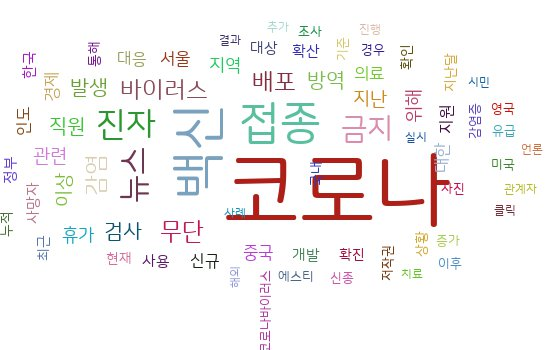

In [6]:
import random
import pytagcloud
import webbrowser

#가장 출현 빈도수 높은 40개의 단어 선정
ranked_tags=remove_char_counter.most_common(70)

#pytagcloud로 출력할 40개 단어를 입력/단어 출력 최대 크기 80개
taglist=pytagcloud.make_tags(ranked_tags, maxsize=80)

#pytagcloud 이미지 생성
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(700,350), fontname='NanumSquareRoundR', rectangular=False)

#생성한 이미지 주피터 노트북에 출력
from IPython.display import Image
Image(filename='wordcloud.jpg')